In [11]:
import numpy as np
from PIL import Image
import astropy.units as u
import astropy.constants as const
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import importlib
from datetime import datetime
import os
import lenser_v0 as lenser

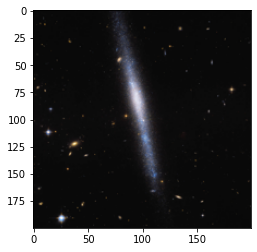

In [49]:
# the width of the image in pixels
pixels = 200
# the width of the image in arcseconds
image_size = 50 * u.arcsec

# a scale parameter used for conversion between pixels and arcseconds
pixel_size = image_size / pixels

# choose what image we want to lens, put it in a nice format, and display
im = Image.open('./test_images/test_image_14.jpg').convert('RGB') #Opens a picture in grayscale
im = im.resize((pixels,pixels))
test_image = np.array(im)
plt.imshow(test_image)
im.close()

In [50]:
importlib.reload(lenser)

<module 'lenser_v0' from '/home/lars/Astro425-A20/Final_Project/lenser_v0.py'>

In [51]:
x = 0    # lens x location in arcseconds
y = 0    # lens y location in arcseconds
minimum_normalized_angle = 0.0

test_lens = lenser.Lens(source_image=test_image,
                        lens_x=x, lens_y=y,
                        pixel_size=pixel_size,
                        min_normalized_angle=minimum_normalized_angle)
test_lens.deflect(method=2, verbosity=1)

now = datetime.now()
dt_string = now.strftime("%Y-%m-%d_%H-%M-%S")
np.save("./test_results/"+dt_string+".npy", test_lens.result)

now at j : 0
now at j : 20
now at j : 40
now at j : 60
now at j : 80
now at j : 100
now at j : 120
now at j : 140
now at j : 160
now at j : 180


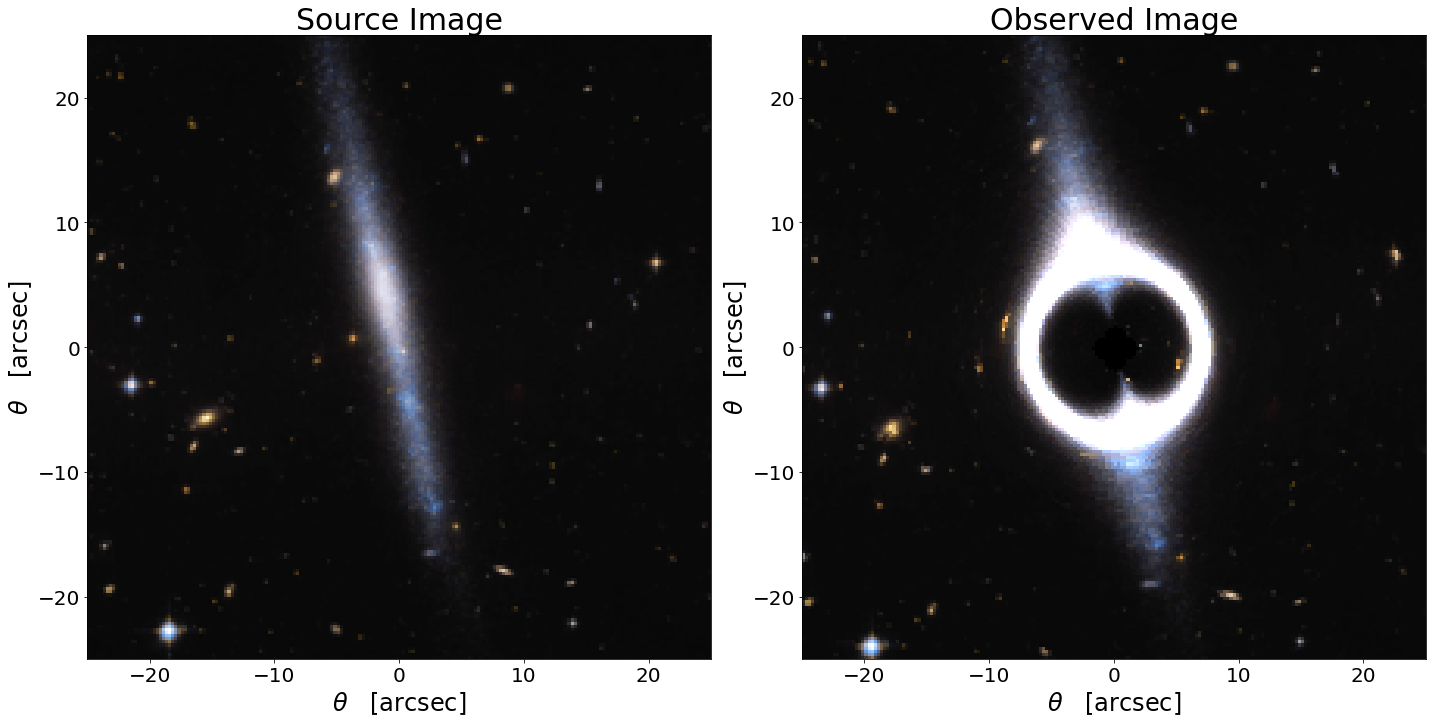

In [52]:
fig = test_lens.draw(do_circle=False, do_log_scale=False)

now = datetime.now()
dt_string = now.strftime("%Y-%m-%d_%H-%M-%S")
plt.savefig("./test_results/" + dt_string + ".png")